# Import required libraries

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Read in new .csv as Pandas DataFrame

In [54]:
store = pd.read_csv('Store 7141 Raw Data (clean).csv')
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50847 entries, 0 to 50846
Data columns (total 32 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Trans_id      50847 non-null  object 
 1   Menu_id       50847 non-null  int64  
 2   Sand_id       50847 non-null  int64  
 3   Employees     50847 non-null  int64  
 4   Bread_CT      50847 non-null  int64  
 5   Cheese_CT     50847 non-null  int64  
 6   Protein_CT    50847 non-null  int64  
 7   Produce_CT    50847 non-null  int64  
 8   Wrap_CT       50847 non-null  int64  
 9   Payment_CT    50847 non-null  int64  
 10  Cycle         50847 non-null  int64  
 11  Labor_Cost    50847 non-null  object 
 12  Bread_Cost    50847 non-null  object 
 13  Cheese_Cost   50847 non-null  object 
 14  Protein_Cost  50847 non-null  object 
 15  Produce_Cost  50847 non-null  object 
 16  Wrap_Cost     50847 non-null  object 
 17  Total_Cost    50847 non-null  object 
 18  Price         50847 non-nu

In [56]:
store['DateTime'] = pd.to_datetime(store['DateTime'])
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50847 entries, 0 to 50846
Data columns (total 32 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Trans_id      50847 non-null  object        
 1   Menu_id       50847 non-null  int64         
 2   Sand_id       50847 non-null  int64         
 3   Employees     50847 non-null  int64         
 4   Bread_CT      50847 non-null  int64         
 5   Cheese_CT     50847 non-null  int64         
 6   Protein_CT    50847 non-null  int64         
 7   Produce_CT    50847 non-null  int64         
 8   Wrap_CT       50847 non-null  int64         
 9   Payment_CT    50847 non-null  int64         
 10  Cycle         50847 non-null  int64         
 11  Labor_Cost    50847 non-null  object        
 12  Bread_Cost    50847 non-null  object        
 13  Cheese_Cost   50847 non-null  object        
 14  Protein_Cost  50847 non-null  object        
 15  Produce_Cost  50847 non-null  object

# Pandas Pivot Tables

In [57]:
store.pivot_table('Trans_id', 'Size', 'Month', aggfunc='count') #default is (values, index, columns)

Month,April,August,December,February,January,July,June,March,May,November,October,September
Size,,,,,,,,,,,,
12-inch,1441,1701,1230,1141,1718,1687,1691,1411,1525,1873,1326,1485
6-inch,2838,3426,2375,2450,1689,3395,3183,2747,2917,1904,2716,2978


In [58]:
#month_order = pd.date_range('2017-01-01', periods=12, freq='M').strftime('%B')
month_order = ['January','February','March','April','May','June','July','August','September','October','November','December']
store['Month'] = pd.Categorical(store['Month'], categories=month_order, ordered=True)

store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50847 entries, 0 to 50846
Data columns (total 32 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Trans_id      50847 non-null  object        
 1   Menu_id       50847 non-null  int64         
 2   Sand_id       50847 non-null  int64         
 3   Employees     50847 non-null  int64         
 4   Bread_CT      50847 non-null  int64         
 5   Cheese_CT     50847 non-null  int64         
 6   Protein_CT    50847 non-null  int64         
 7   Produce_CT    50847 non-null  int64         
 8   Wrap_CT       50847 non-null  int64         
 9   Payment_CT    50847 non-null  int64         
 10  Cycle         50847 non-null  int64         
 11  Labor_Cost    50847 non-null  object        
 12  Bread_Cost    50847 non-null  object        
 13  Cheese_Cost   50847 non-null  object        
 14  Protein_Cost  50847 non-null  object        
 15  Produce_Cost  50847 non-null  object

In [59]:
store.pivot_table('Trans_id', 'Size', 'Month', aggfunc='count') #default is (values, index, columns)

Month,January,February,March,April,May,June,July,August,September,October,November,December
Size,,,,,,,,,,,,
12-inch,1718,1141,1411,1441,1525,1691,1687,1701,1485,1326,1873,1230
6-inch,1689,2450,2747,2838,2917,3183,3395,3426,2978,2716,1904,2375


In [60]:
headers = ['Conv', 'Wait', 'Value','Quality','Grade']

In [61]:
pivot_table = store.pivot_table(values=headers, columns='Month', aggfunc='mean').round(1)
pivot_table

Month,January,February,March,April,May,June,July,August,September,October,November,December
Conv,6.3,6.3,6.3,6.4,6.3,6.4,6.3,6.4,6.4,6.4,6.3,6.4
Grade,52.2,50.1,49.8,50.1,49.7,49.7,49.6,49.9,49.8,49.9,52.1,49.9
Quality,27.4,27.4,27.2,27.4,27.4,27.1,27.4,27.3,27.4,27.5,27.3,27.3
Value,25.5,23.4,23.0,23.0,23.2,23.3,23.2,23.0,23.2,23.0,25.2,23.3
Wait,-7.1,-7.0,-6.8,-6.7,-7.1,-7.1,-7.4,-6.7,-7.2,-7.1,-6.6,-7.0


In [62]:
#run this first
#pivot1 = store.pivot_table(values='Bread_CT',index=['Sand','Size'],columns='Month',aggfunc='count')

#better way to switch
pivot1 = store.pivot_table(values='Bread_CT',index=['Size','Sand'],columns='Month',aggfunc='count')
pivot1

Month             January  February  March  April  May  June  July  August  \
Size    Sand                                                                 
12-inch BLT           166        94    124    116  136   145   156     163   
        Chicken       359       195    279    298  277   345   296     323   
        Cold Cut      358       231    309    276  355   342   363     357   
        Italian       244       162    192    225  212   246   250     254   
        Meatball      116        58     95    111  114   136   136     120   
        Pastrami      176       121    142    152  149   176   164     195   
        Steak         299       280    270    263  282   301   322     289   
6-inch  BLT           171       201    249    218  281   283   275     302   
        Chicken       328       469    563    582  593   595   643     658   
        Cold Cut      373       490    591    633  602   714   753     781   
        Italian       245       287    379    378  406   442   483     517   
        Meatball      107       166    201    193  211   240   263     245   
        Pastrami      204       213    308    301  307   300   368     307   
        Steak         261       624    456    533  517   609   610     616   

Month             September  October  November  December  
Size    Sand                                              
12-inch BLT             152       91       161       105  
        Chicken         298      239       373       248  
        Cold Cut        311      252       384       287  
        Italian         197      323       276       170  
        Meatball         97       85       147        80  
        Pastrami        151      128       188       124  
        Steak           279      208       344       216  
6-inch  BLT             257      213       168       244  
        Chicken         574      488       383       446  
        Cold Cut        651      517       418       502  
        Italian         421      669       279       363  
        Meatball        215      165       129       159  
        Pastrami        290      236       209       240  
        Steak           570      428       318       421

In [63]:
#ask if we really have a need for looking at 6-inch vs. 12-inch
pivot1 = store.pivot_table(values='Bread_CT',index=['Sand'],columns='Month',aggfunc='count')
pivot1

Month,January,February,March,April,May,June,July,August,September,October,November,December
Sand,,,,,,,,,,,,
BLT,337,295,373,334,417,428,431,465,409,304,329,349
Chicken,687,664,842,880,870,940,939,981,872,727,756,694
Cold Cut,731,721,900,909,957,1056,1116,1138,962,769,802,789
Italian,489,449,571,603,618,688,733,771,618,992,555,533
Meatball,223,224,296,304,325,376,399,365,312,250,276,239
Pastrami,380,334,450,453,456,476,532,502,441,364,397,364
Steak,560,904,726,796,799,910,932,905,849,636,662,637


In [ ]:
store.loc[(store['Sand']=='BLT') & (store['Month']=='January')]

In [64]:
pivot1.style.background_gradient(axis=None, cmap='RdYlGn')

Month,January,February,March,April,May,June,July,August,September,October,November,December
Sand,,,,,,,,,,,,
BLT,337,295,373,334,417,428,431,465,409,304,329,349
Chicken,687,664,842,880,870,940,939,981,872,727,756,694
Cold Cut,731,721,900,909,957,1056,1116,1138,962,769,802,789
Italian,489,449,571,603,618,688,733,771,618,992,555,533
Meatball,223,224,296,304,325,376,399,365,312,250,276,239
Pastrami,380,334,450,453,456,476,532,502,441,364,397,364
Steak,560,904,726,796,799,910,932,905,849,636,662,637


# Using Pivot Table Visualization Tools

<Axes: xlabel='Sand'>

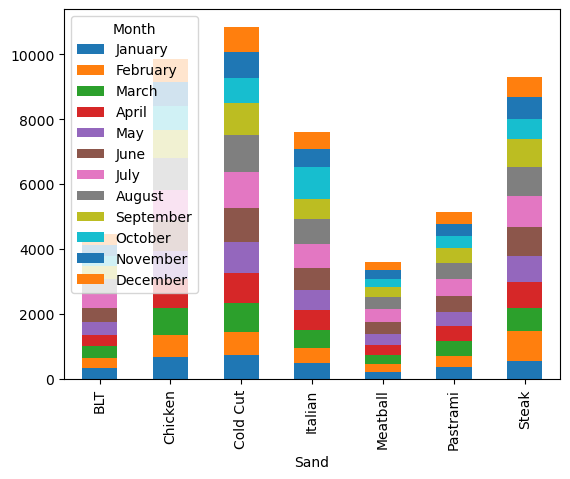

In [65]:
pivot1.plot(kind='bar', stacked=True)

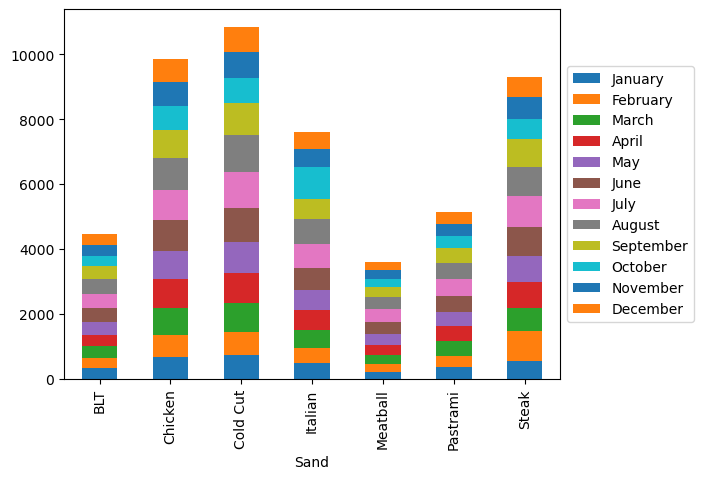

In [66]:
ax1 = pivot1.plot(kind='bar', stacked=True)
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))

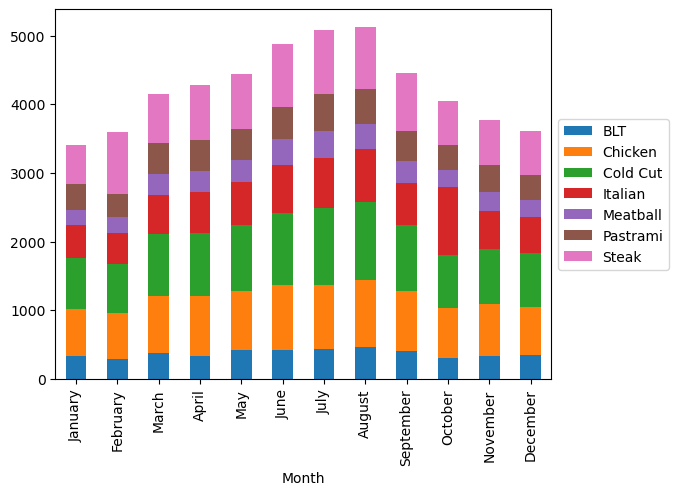

In [67]:
pivot2 = store.pivot_table(values='Bread_CT',index=['Month'],columns='Sand',aggfunc='count')
ax2 = pivot2.plot(kind='bar',stacked=True)
ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Python Exercise 5

In [68]:
#create a 3rd pivot table to show a breakdown by average processes and shift
process_headers = ['Bread_CT', 'Cheese_CT', 'Protein_CT', 'Produce_CT', 'Wrap_CT', 'Payment_CT', 'Cycle']
pivot3 = store.pivot_table(values=process_headers, index='Shift', aggfunc='mean').round(1)
pivot3

,Bread_CT,Cheese_CT,Cycle,Payment_CT,Produce_CT,Protein_CT,Wrap_CT
Shift,,,,,,,
Dinner,82.3,32.5,329.2,134.2,50.7,14.1,15.5
Evening,44.0,35.1,202.8,40.5,50.5,14.1,18.6
Lunch,42.2,33.7,192.1,35.4,50.5,14.0,16.3
Mid-Day,44.2,34.7,198.6,37.8,50.2,14.2,17.5
Morning,44.4,35.0,204.3,41.0,51.8,13.9,18.3


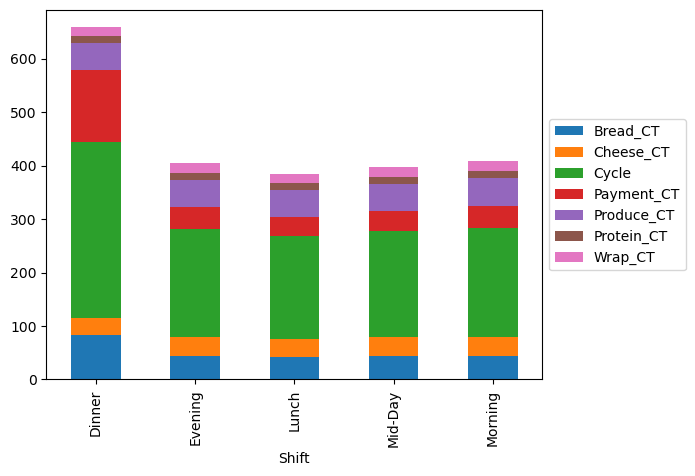

In [69]:
#why is this chart incorrect?
#think about what other cleaning things you would want to do
ax3 = pivot3.plot(kind='bar',stacked=True)
ax3.legend(loc='center left', bbox_to_anchor=(1, 0.5))

## Optional Exploration

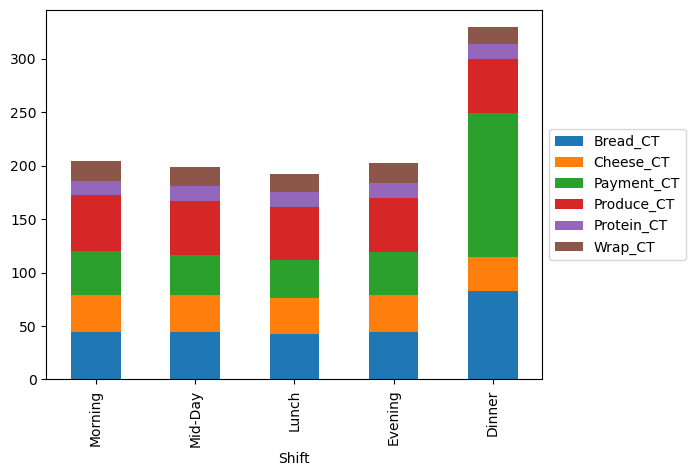

In [71]:
#implementing order of shifts and removing double counting with Cycle
shift_order = ['Morning', 'Mid-Day', 'Lunch', 'Evening', 'Dinner']
store['Shift'] = pd.Categorical(store['Shift'], categories=shift_order, ordered=True)

process_headers_2 = ['Bread_CT', 'Cheese_CT', 'Protein_CT', 'Produce_CT', 'Wrap_CT', 'Payment_CT']
pivot4 = store.pivot_table(values=process_headers_2, index='Shift', aggfunc='mean').round(1)

ax4 = pivot4.plot(kind='bar',stacked=True)
ax4.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [ ]:
store_dinner = store.loc[(store['Shift'] == 'Dinner')]
store_dinner